In [1]:
from sklearn import metrics, random_projection, cross_validation, datasets, grid_search, linear_model, metrics, random_projection, manifold, preprocessing
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from collections import  Counter
import numpy as np
import pandas as pd
from sklearn.decomposition import RandomizedPCA
from sklearn import manifold
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import SGDRegressor, RandomizedLogisticRegression
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn import svm
%pylab inline

/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


In [2]:
list_df = [pd.read_csv('dataframe/genres_13.csv'), pd.read_csv('dataframe/genres_20.csv'),
           pd.read_csv('dataframe/genres_30.csv'), pd.read_csv('dataframe/genres_40.csv'), 
           pd.read_csv('dataframe/genres_50.csv')]
for i in range(len(list_df)):
    list_df[i].loc[:, 'm1':] = preprocessing.normalize(list_df[i].loc[:, 'm1':])
    list_df[i] = list_df[i].sample(frac=1)
#     list_df[i] = list_df[i][:800]

In [3]:
def search_abnom(dataframe, label, g, nu):
    svm_ = svm.OneClassSVM(gamma=g, nu=nu)
    svm_.fit(dataframe[dataframe['tag'] == label].loc[:, 'm1':])
    l = svm_.predict(dataframe[dataframe['tag'] == label].loc[:, 'm1':])
    return l

labels = ['hiphop', 'classical', 'jazz', 'rock', 'metal', 'synth', 'pop', 'blues']
for i in range(len(list_df)):
    for label in labels:
        svm_label = search_abnom(list_df[i], label, 2, 0.15).tolist()
        list_df[i][list_df[i]['tag'] == label] = list_df[i][list_df[i]['tag'] == label][np.array(svm_label) == 1]
        list_df[i] = list_df[i].dropna()

In [5]:
lrc = LogisticRegression(C = 350)

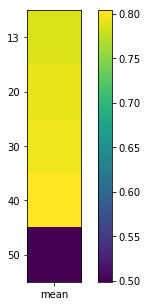

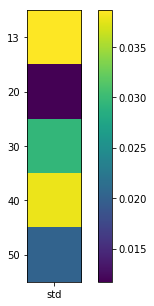

In [6]:
list_rps = []
for i in range(5):
    ridge_scoring2 = cross_validation.cross_val_score(lrc, list_df[i].loc[:, 'm1':], list_df[i]['tag'], 
                                                          scoring='f1_weighted', cv = 10)
    list_rps.append(ridge_scoring2)

m = np.transpose(np.array([list_rps]).mean(axis=2))
s = np.transpose(np.array([list_rps]).std(axis=2))
                 
figure(figsize=(6,5))
plt.imshow(m)
plt.colorbar()
plt.yticks(np.arange(5), ('13', '20', '30', '40', '50'))
plt.xticks([0], ('mean',))

figure(figsize=(6,5))
plt.imshow(s)
plt.colorbar()
plt.yticks(np.arange(5), ('13', '20', '30', '40', '50'))
plt.xticks([0], ('std',))
show()

In [40]:
ridge_scoring2 = cross_validation.cross_val_score(lrc, list_df[3].loc[:, 'm1':], list_df[3].loc[:, 'tag'], 
                                                          scoring='f1_weighted', cv = 10)
print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring2.mean(), ridge_scoring2.max(),
                                                     ridge_scoring2.min(), ridge_scoring2.std()))

Ridge mean:0.8016263138336249, max:0.8319662957893705, min:0.7604053894864823, std:0.025597102133244027


In [60]:
def synthesis_coef(list_numb, func):
    list_scoring = []
    for i in range(5):
        list_rps = []
        for j in range(4):
            projection = func(n_components = list_numb[i][j])
            data_rp = projection.fit_transform(list_df[i].loc[:, 'm1':])
            ridge_scoring2 = cross_validation.cross_val_score(lrc, data_rp, list_df[i].loc[:, 'tag'], 
                                                              scoring='f1_weighted', cv = 10)
    #         print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring2.mean(), ridge_scoring2.max(),
    #                                                              ridge_scoring2.min(), ridge_scoring2.std()))
            list_rps.append(ridge_scoring2)
        list_scoring.append(list_rps)
    return list_scoring

def selection_coef(list_numb, list_fi):
    list_scoring = []
    for i in range(5):
        list_rps = []
        for j in range(4):
            data_more_med = list_df[i].loc[:, list_fi[i]>np.median(list_fi[i])*list_numb[j]]
            ridge_scoring2 = cross_validation.cross_val_score(lrc, data_more_med.loc[:, 'm1':], data_more_med.loc[:, 'tag'], 
                                                              scoring='f1_weighted', cv = 10)
    #         print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring2.mean(), ridge_scoring2.max(),
    #                                                              ridge_scoring2.min(), ridge_scoring2.std()))
            list_rps.append(ridge_scoring2)
        list_scoring.append(list_rps)
    return list_scoring

def pain_ls(list_scoring):
    figure(figsize=(6,5))
    plt.imshow(np.array(list_scoring).mean(axis=2)) 
    plt.colorbar()
    # plt.plot(range(6), np.array(list_scoring[0]).mean(axis=1))
    # plt.plot(range(6), np.array(list_scoring[0]).max(axis=1) - np.array(list_scoring).min(axis=1))
    plt.yticks(np.arange(5), ('13', '20', '30', '40', '50'))
    plt.xticks(np.arange(4), ('2', '3', '4', '5'))
    show()

    figure(figsize=(6,5))
    plt.imshow(np.array(list_scoring).std(axis=2)) 
    plt.colorbar()
    # plt.plot(range(6), np.array(list_scoring[0]).mean(axis=1))
    # plt.plot(range(6), np.array(list_scoring[0]).max(axis=1) - np.array(list_scoring).min(axis=1))
    plt.yticks(np.arange(5), ('13', '20', '30', '40', '50'))
    plt.xticks(np.arange(4), ('2', '3', '4', '5'))
    show()

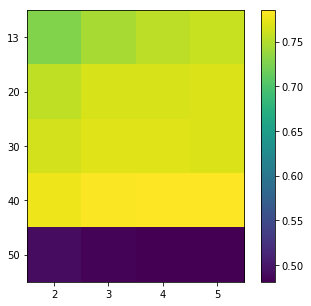

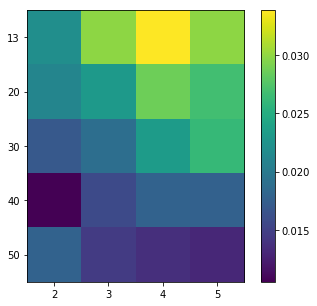

In [61]:
list_numb = [[20,  30,  40,  50],
             [40,  55,  70,  85],
             [60,  80,  105, 130],
             [80,  120, 150, 170],
             [100, 140, 180, 220]]
pain_ls(synthesis_coef(list_numb, TruncatedSVD))

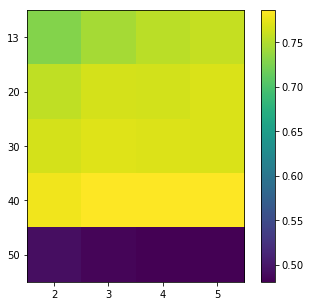

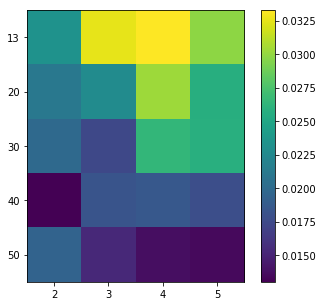

In [62]:
list_numb = [[20,  30,  40,  50],
             [40,  55,  70,  85],
             [60,  80,  105, 130],
             [80,  120, 150, 170],
             [100, 140, 180, 220]]
pain_ls(synthesis_coef(list_numb, PCA))

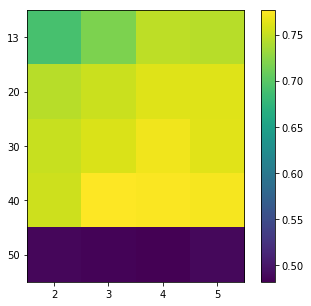

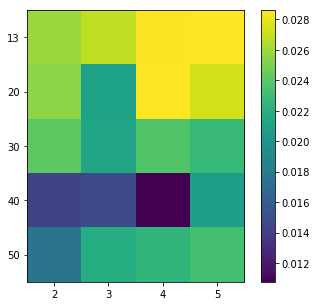

In [63]:
pain_ls(synthesis_coef(list_numb, random_projection.SparseRandomProjection))

In [69]:
rfc = RandomForestClassifier(max_depth=25, min_samples_split=6, n_estimators=500)
fi = []
for df in list_df:
    rfc.fit(df.loc[:, 'm1':], df.loc[:, 'tag'])
    fi.append(rfc.feature_importances_) 

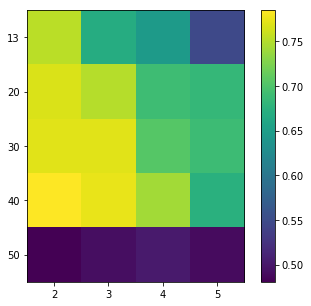

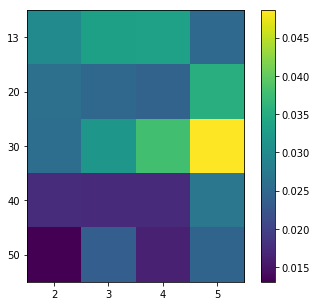

In [70]:
list_numb = [0.5,  1,  1.5,  1.9]
pain_ls(selection_coef(list_numb, fi))

In [76]:
label_dict = {'hiphop':0, 'classical':1, 'jazz':2, 'rock':3, 'metal':4, 'synth':5, 'pop':6, 'blues': 7} 
int_label = []
for label in list_df[3]['tag']:
    int_label.append(label_dict[label])

In [79]:
list_rps = []
list_C = [0.75, 0.85, 1.0, 1.15, 1.30]
for j in range(5):
    rlg = RandomizedLogisticRegression(C=list_C[j])
    rlg.fit(list_df[3].loc[:, 'm1':], int_label)
    data_rlr = list_df[3].loc[:, np.array([1] + rlg.scores_.tolist())>0]
    print(shape(data_rlr))
    ridge_scoring2 = cross_validation.cross_val_score(lrc, data_rlr.loc[:, data_rlr.columns[1]:], data_rlr['tag'], 
                                                          scoring='f1_weighted', cv = 10)
#         print('Ridge mean:{}, max:{}, min:{}, std:{}'.format(ridge_scoring2.mean(), ridge_scoring2.max(),
#                                                              ridge_scoring2.min(), ridge_scoring2.std()))
    list_rps.append(ridge_scoring2)

/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(1601, 110)


/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(1601, 130)


/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(1601, 149)


/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(1601, 169)


/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


(1601, 177)


In [ ]:
np.array([list_rps]).mean(axis=2)

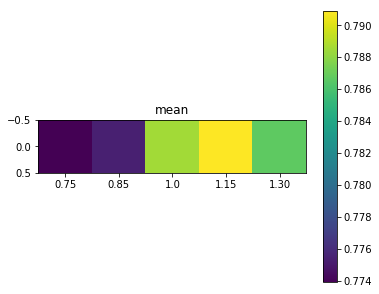

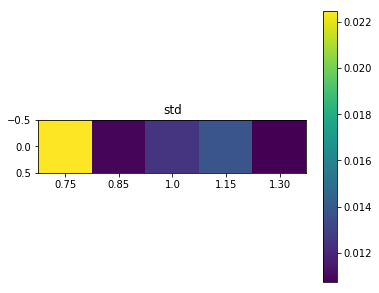

In [81]:
figure(figsize=(6,5))
plt.imshow(np.array([list_rps]).mean(axis=2)) 
plt.colorbar()
# plt.plot(range(6), np.array(list_scoring[0]).mean(axis=1))
# plt.plot(range(6), np.array(list_scoring[0]).max(axis=1) - np.array(list_scoring).min(axis=1))
plt.xticks(np.arange(5), ('0.75', '0.85', '1.0', '1.15', '1.30'))
plt.title('mean')
show()

figure(figsize=(6,5))
plt.imshow(np.array([list_rps]).std(axis=2)) 
plt.colorbar()
    # plt.plot(range(6), np.array(list_scoring[0]).mean(axis=1))
    # plt.plot(range(6), np.array(list_scoring[0]).max(axis=1) - np.array(list_scoring).min(axis=1))
plt.xticks(np.arange(5), ('0.75', '0.85', '1.0', '1.15', '1.30'))
plt.title('std')
show()

In [ ]:
len(rlg.get_support()[rlg.get_support() == True])

In [85]:
# from scipy import save

rlg = RandomizedLogisticRegression(C=1.15)
rlg.fit(list_df[3].loc[:, 'm1':], int_label)
save('regr_param.npy', rlg.scores_>0)

# (rlg.scores_)>0

/home/tosha/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
